In [35]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import seaborn as sns

In [4]:
stock = yf.Ticker("MSFT")
stock = stock.history(period='2y')


In [5]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,0.0,0.0
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,0.0,0.0
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,0.0,0.0
2022-08-08 00:00:00-04:00,279.146950,280.984697,274.498615,275.481354,18739200,0.0,0.0
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,0.0,0.0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,0.0,0.0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,0.0,0.0


In [6]:
del stock['Dividends']
del stock['Stock Splits']

In [7]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600
2022-08-08 00:00:00-04:00,279.146950,280.984697,274.498615,275.481354,18739200
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200
...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400


<Axes: xlabel='Date'>

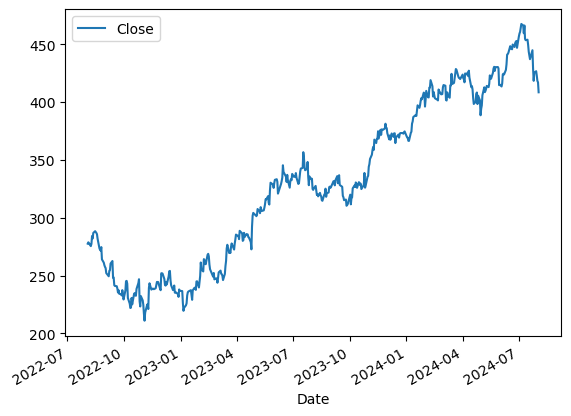

In [8]:
stock.plot.line(y="Close")

In [9]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [10]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,278.753845
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,278.026581
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,275.481354
2022-08-08 00:00:00-04:00,279.146950,280.984697,274.498615,275.481354,18739200,277.427094
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,284.168732
...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985


In [11]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [12]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,278.753845,1
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,278.026581,0
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,275.481354,0
2022-08-08 00:00:00-04:00,279.146950,280.984697,274.498615,275.481354,18739200,277.427094,1
2022-08-09 00:00:00-04:00,274.813035,278.193628,272.818047,277.427094,23405200,284.168732,1
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013,0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006,0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985,0


In [13]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [14]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [16]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.4933 - loss: 0.7021
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.5191 - loss: 0.6979
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.6111 - loss: 0.6872
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.5795 - loss: 0.6865
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6636 - loss: 0.6819
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6059 - loss: 0.6819
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.6148 - loss: 0.6774
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.6060 - loss: 0.6707
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.5952 - loss: 0.6707
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.6628 - loss: 0.6643
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.6901 - loss: 0.6638
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9144 - loss: 0.2616
Test Loss: 0.2621819078922272, Test Accuracy: 0.9108911156654358


In [20]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [21]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [22]:
precision_score(y_test,predictions)

0.9583333333333334

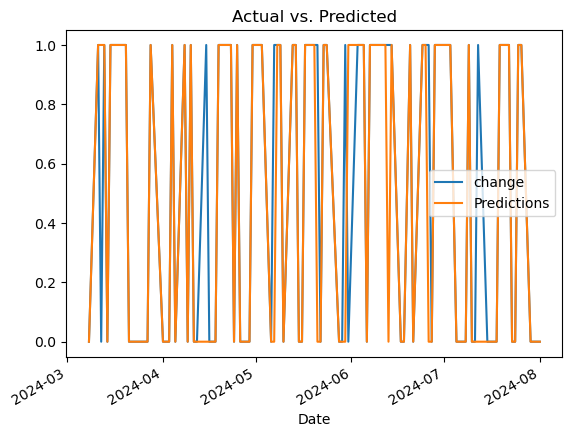

In [23]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')
plt.show()

In [24]:
# Prepare latest data for prediction
latest_data = X_scaled[-1].reshape(1, -1)  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns=X.columns)

In [25]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data_df).round().flatten()[0]
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction for the next day: Stock Will Go Down


[*********************100%%**********************]  10 of 10 completed


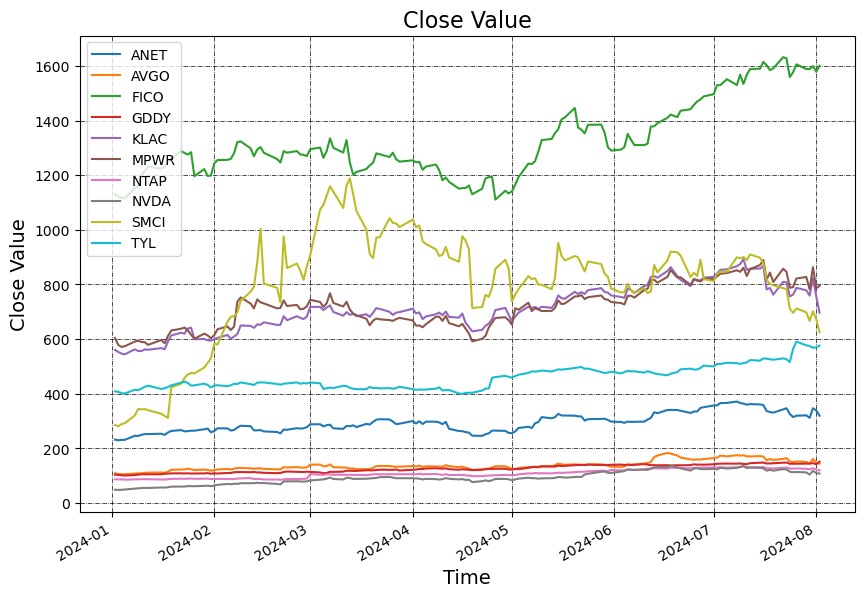

In [26]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']

# Plot all the close prices
((data.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [27]:
data.describe()

Ticker,ANET,AVGO,FICO,GDDY,KLAC,MPWR,NTAP,NVDA,SMCI,TYL
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,293.677704,136.891095,1321.362640,125.458244,710.998988,717.211757,106.745203,92.495851,794.760470,458.798987
std,34.328898,17.565868,138.107008,14.052017,84.281535,80.502006,15.436632,23.496284,204.363723,44.270339
min,229.399994,104.901001,1110.849976,100.220001,544.309998,571.059998,84.599998,47.569000,280.640015,399.220001
25%,265.355011,125.608250,1230.782501,112.980000,653.475021,652.012527,89.077501,78.319252,729.882492,420.964989
50%,289.044998,133.115501,1283.475037,123.735001,698.890015,715.779999,104.765003,89.425003,829.144989,440.940002
75%,317.544991,143.667755,1386.494995,138.972496,772.469986,780.147507,122.322502,114.393749,904.615021,488.037498
max,371.070007,182.886993,1632.170044,151.250000,892.349976,889.479980,134.619995,135.580002,1188.069946,590.650024


In [65]:
# Calculate the mean and standard deviation for each stock
mean = data.mean()
std_dev = data.std()

# Calculate the z-scores
z_scores = (data - mean) / std_dev

print("Z-Scores:")
z_scores.head()

Z-Scores:


Ticker,ANET,AVGO,FICO,GDDY,KLAC,MPWR,NTAP,NVDA,SMCI,TYL
Date,,,,,,,,,,
2024-01-02,-1.809487,-1.614101,-1.377212,-1.598222,-1.786975,-1.406322,-1.330290,-1.886590,-2.492176,-1.142954
2024-01-03,-1.872408,-1.766670,-1.440858,-1.634516,-1.879522,-1.725569,-1.323812,-1.912083,-2.515713,-1.172320
2024-01-04,-1.838617,-1.821151,-1.476411,-1.744820,-1.952492,-1.815505,-1.340008,-1.893825,-2.475784,-1.296782
2024-01-05,-1.828130,-1.819614,-1.490892,-1.796058,-1.977764,-1.779108,-1.404141,-1.847052,-2.459490,-1.309657
2024-01-08,-1.393220,-1.674047,-1.223201,-1.673656,-1.763601,-1.571411,-1.345190,-1.712733,-2.321745,-1.002454


In [68]:
# Calculate the average z-score over time for each stock
average_z_scores = z_scores.mean()

print("Average Z-Scores Over Time:")
average_z_scores

Average Z-Scores Over Time:


Ticker
ANET   -3.840772e-16
AVGO   -6.721350e-16
FICO    0.000000e+00
GDDY   -2.400482e-16
KLAC   -2.400482e-16
MPWR    4.800964e-16
NTAP    2.400482e-16
NVDA   -2.880579e-16
SMCI   -1.200241e-17
TYL    -1.440289e-16
dtype: float64

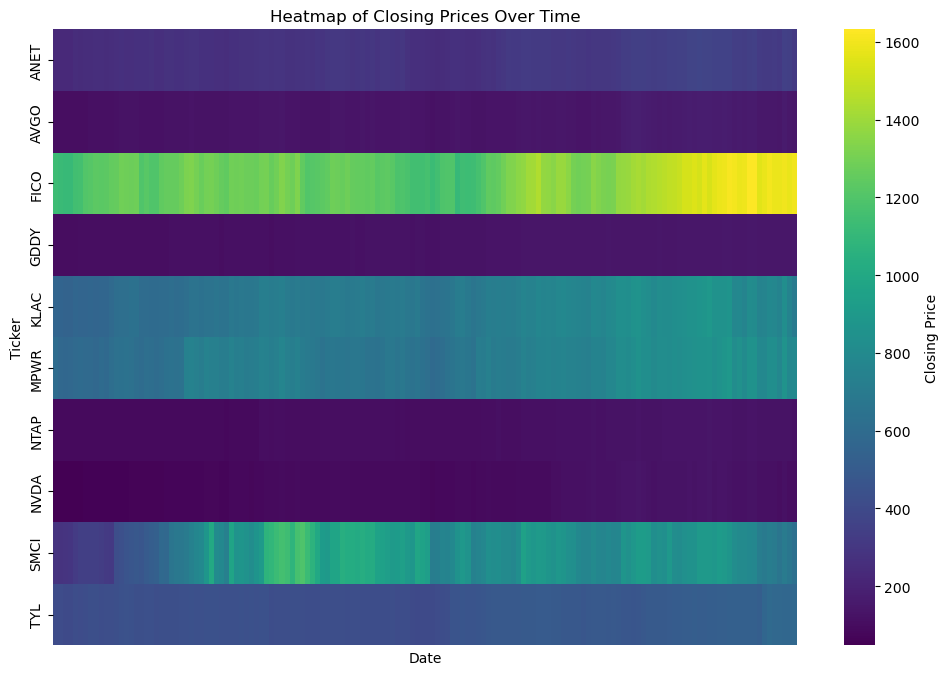

In [54]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.T, cmap='viridis', annot=False, cbar_kws={'label': 'Closing Price'})

# Set the title and labels
plt.title('Heatmap of Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Remove x-axis labels and ticks
plt.gca().set_xticklabels([])
plt.gca().set_xticks([])

plt.show()


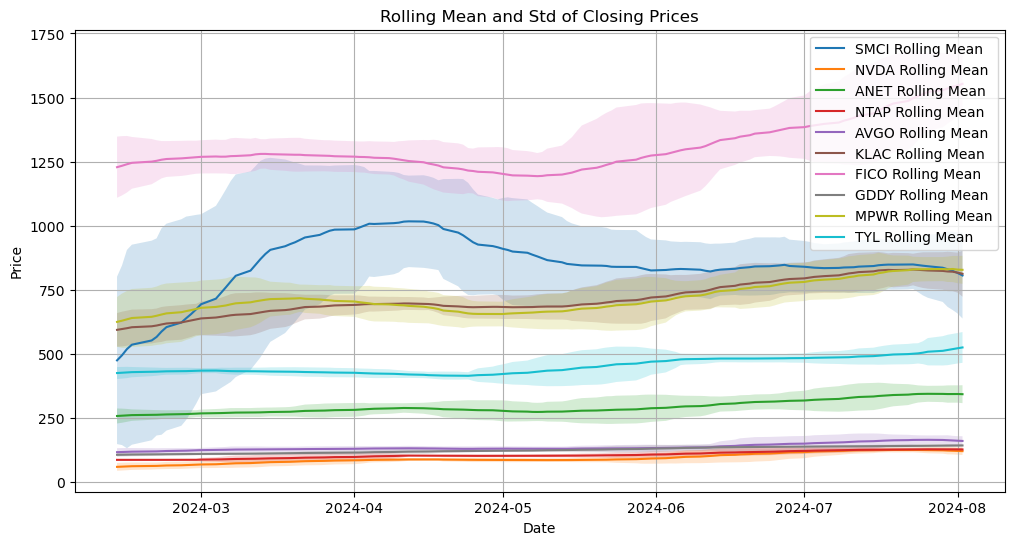

In [40]:
# Rolling Stats- shows trends and volatility (mean and std)

window_size = 30  # 30-day rolling window
plt.figure(figsize=(12, 6))
for ticker in tickers_list:
    rolling_mean = data[ticker].rolling(window=window_size).mean()
    rolling_std = data[ticker].rolling(window=window_size).std()
    plt.plot(data.index, rolling_mean, label=f'{ticker} Rolling Mean')
    plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2)
plt.title('Rolling Mean and Std of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

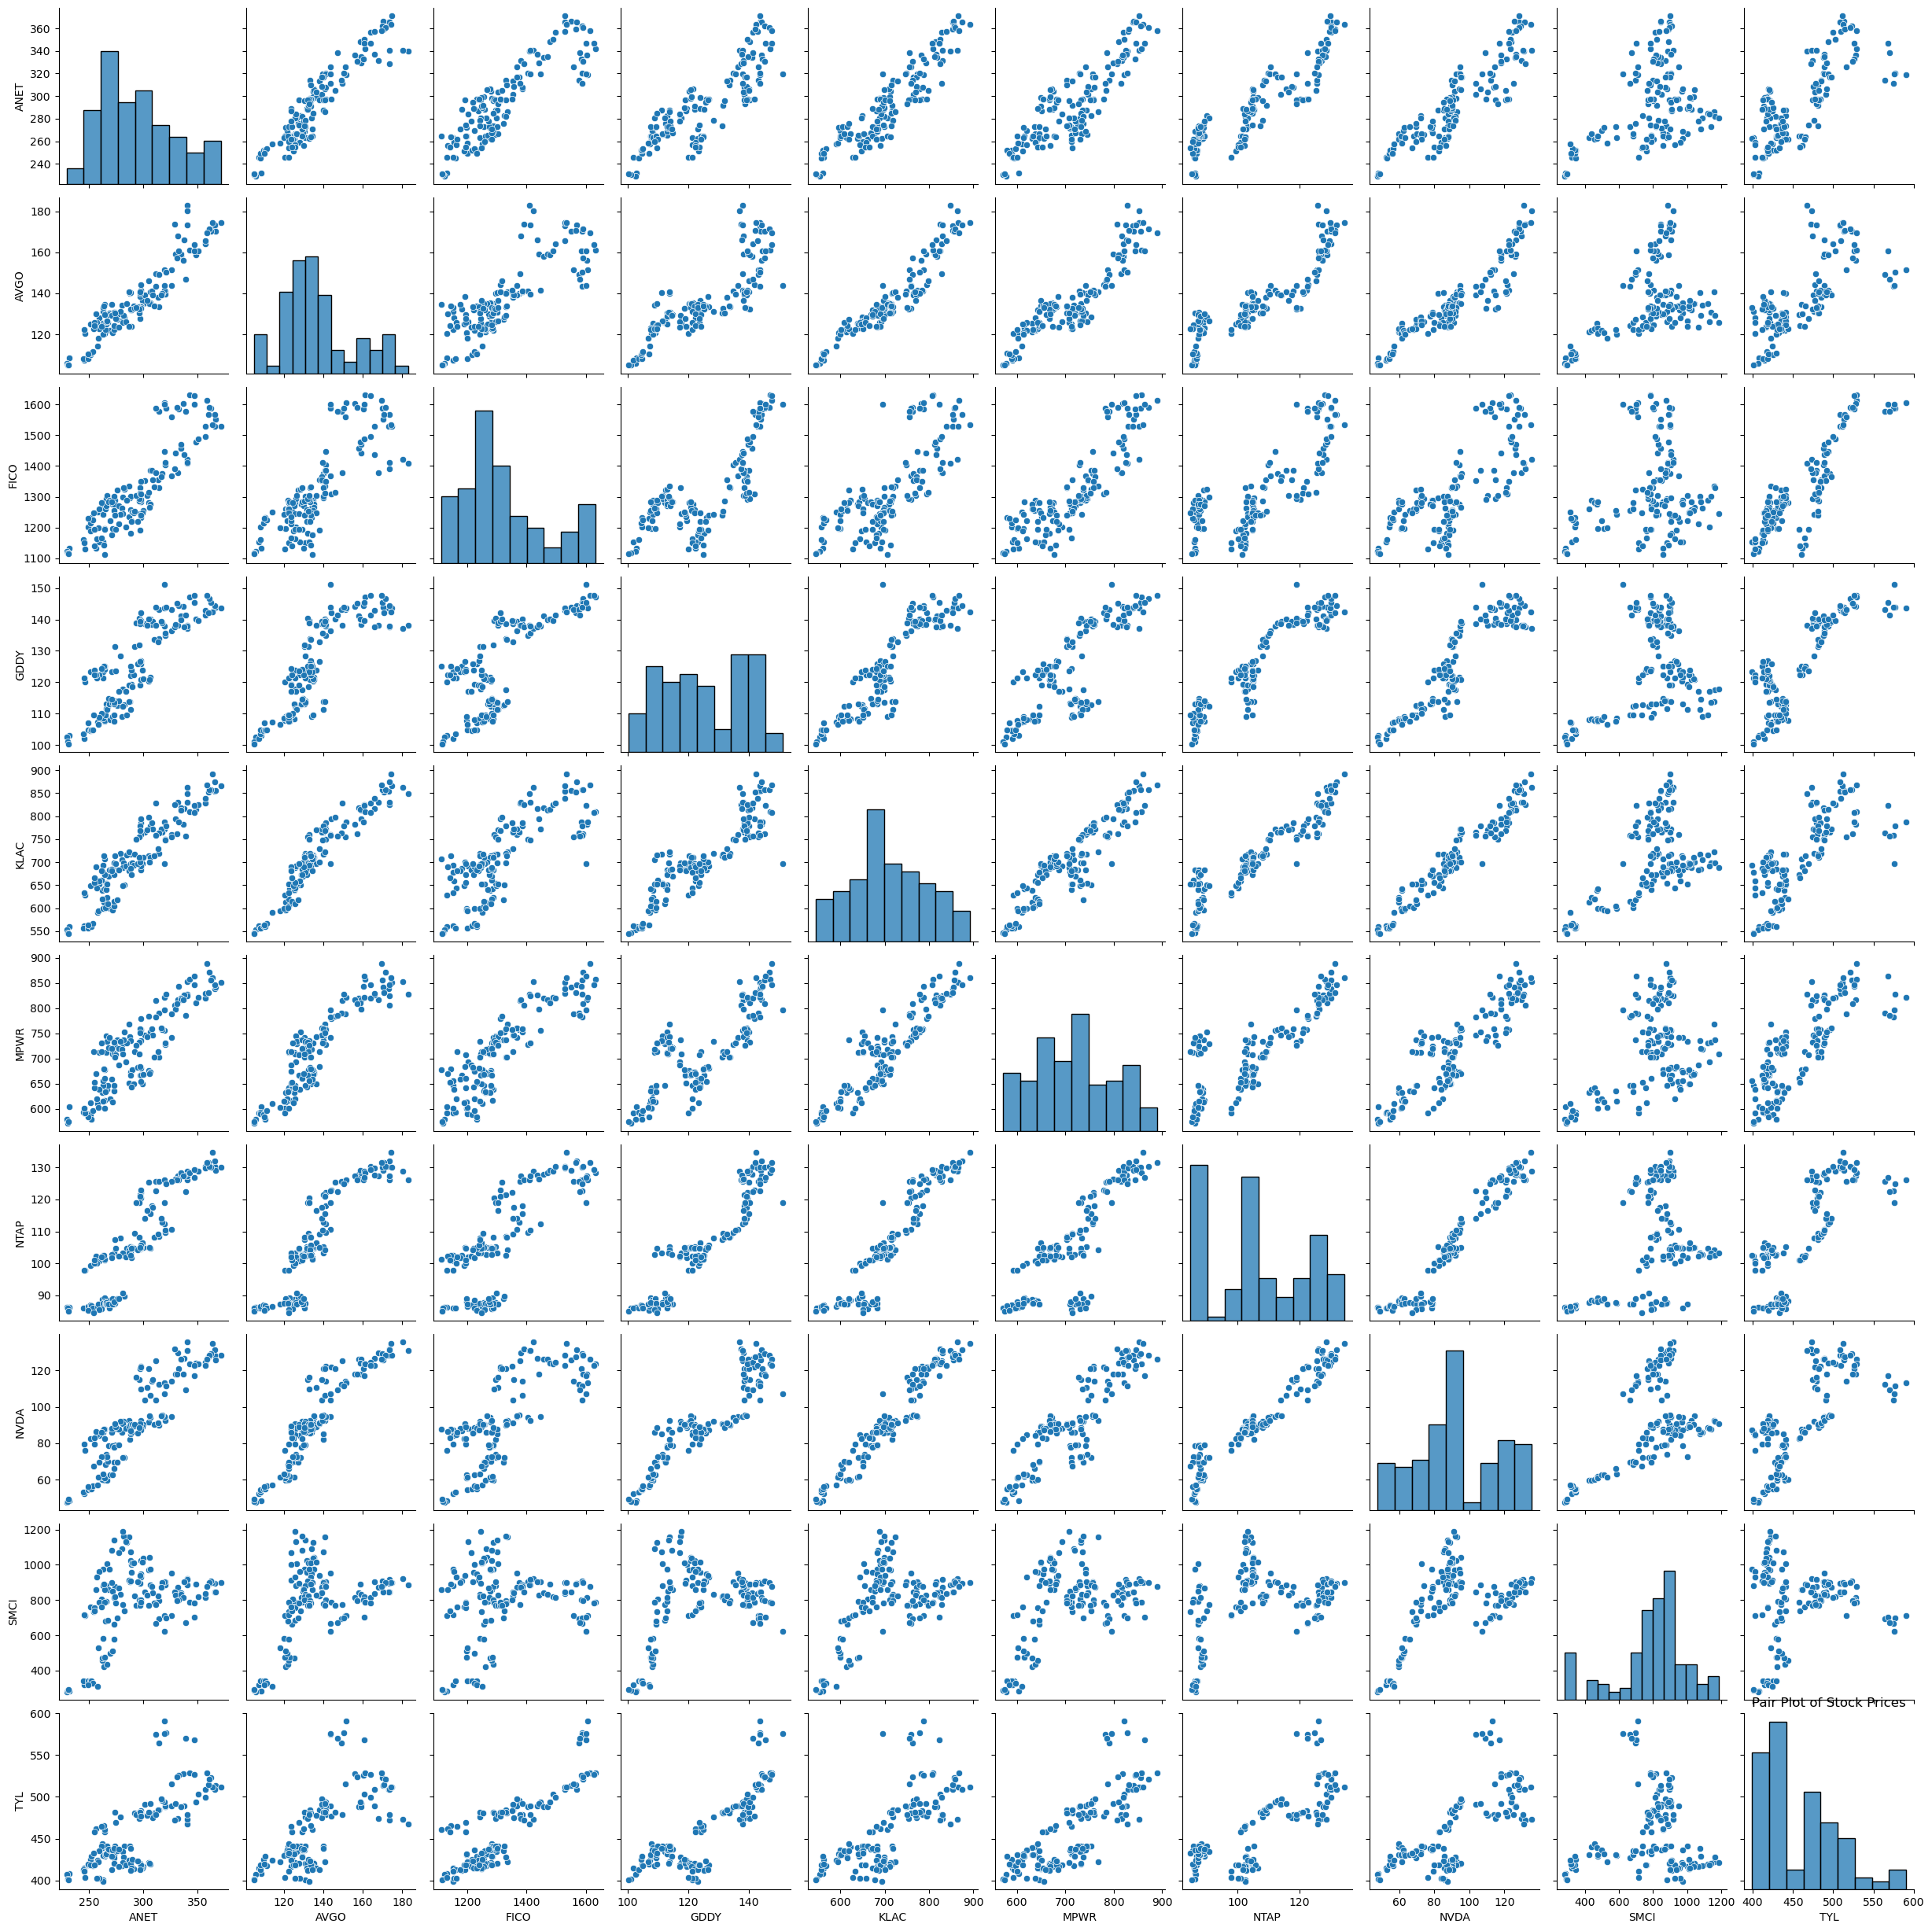

In [58]:
# Pair- shows relationships between stocks

sns.pairplot(data)
plt.title('Pair Plot of Stock Prices')
plt.show()

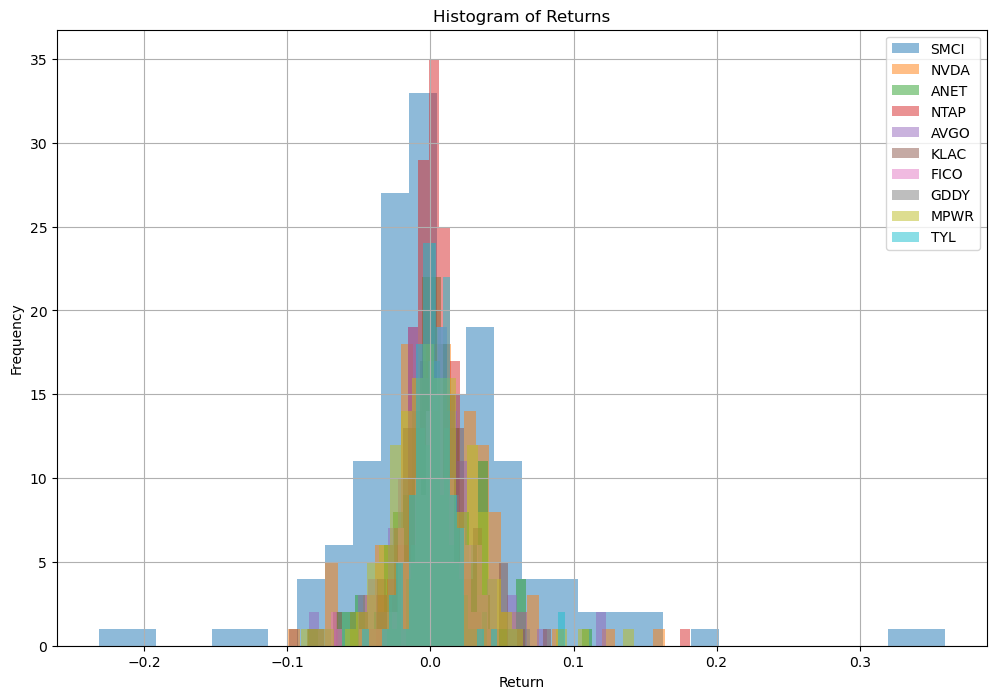

In [59]:
# Histogram - Shows the percentage change of returns to understand volatility and risk

returns = data.pct_change().dropna()
plt.figure(figsize=(12, 8))
for ticker in tickers_list:
    plt.hist(returns[ticker], bins=30, alpha=0.5, label=ticker)
plt.title('Histogram of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


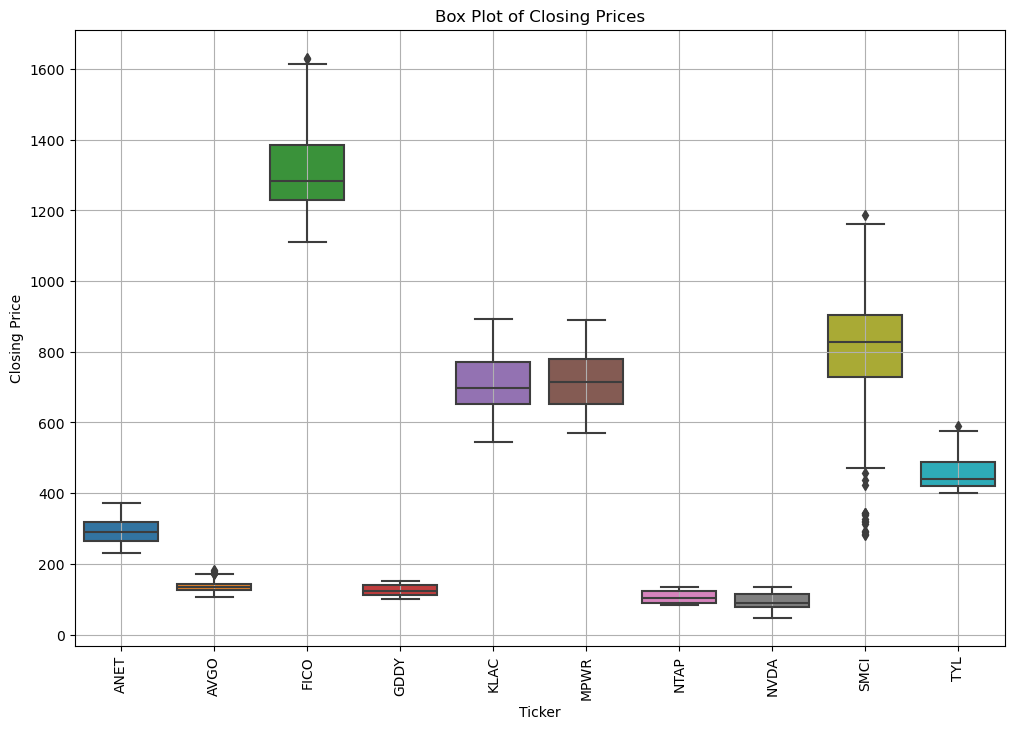

In [62]:
# Boxplot- understanding price variability: distribution of stock prices, highlighting median, quartiles, and outliers.
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Box Plot of Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()